In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

out_ch = 10
in_ch = 100

class double_conv(tf.Module):
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = keras.Sequential([
            layers.Conv2D(out_ch, 3, padding = "SAME", activation=None, input_shape = [28,28, in_ch]), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Conv2D(out_ch, 3, padding = "SAME", activation=None), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu')            
        ])
    def forward(self, x):
        x = self.conv(x)
        return x

class inconv(tf.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)
    def forward(self, x):
        x = self.conv(x)
        return x

class down(tf.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = keras.Sequential(
            layers.MaxPooling2D(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x
        

class up(tf.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = layers.UpSampling2D(size = (2,2), interpolation='bilinear')
        else:
            self.up = layers.Conv2DTranspose(in_ch//2, 2, stride=(2, 2))

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffX = x1.size()[2] - x2.size()[2]
        diffY = x1.size()[3] - x2.size()[3]
        x2 = F.pad(x2, (diffX // 2, int(diffX / 2),
                        diffY // 2, int(diffY / 2)))
        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x
    
model = up(in_ch, out_ch)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

out_ch = 10
in_ch = 100
# model = keras.Sequential([
#     layers.Conv2D(out_ch, 3, padding = "SAME", activation=None, input_shape=(28,28,in_ch)), # keras에서 input_channel의 수가 중요한가?
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Conv2D(out_ch, 3, padding = "SAME", activation=None), # keras에서 input_channel의 수가 중요한가?
#     layers.BatchNormalization(),
#     layers.Activation('relu')   
# ])

class double_conv(tf.Module):
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = keras.Sequential([
            layers.Conv2D(out_ch, 3, padding = "SAME", activation=None, input_shape = [in_ch]), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Conv2D(out_ch, 3, padding = "SAME", activation=None), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu')            
        ])
    def forward(self, x):
        x = self.conv(x)
        return x

model = double_conv(in_ch, out_ch)
# model.forward(model)
# print(model.summary())


ValueError: Input 0 of layer conv2d_22 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 100)

In [46]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("echo", help="write the string u want to echo")
args = parser.parse_args()
print(args.echo)

usage: ipykernel_launcher.py [-h] echo
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from torch.autograd import Variable

x = torch.arange(10).reshape(5,2)
# print(x)
print(torch.split(x, 2),1)
# print(torch.split(x, [1,4]))

y = np.arange(10).reshape(5,2)
try:
    print(tf.split(y, 2),1)
except:
    print("Hello")
# print(tf.split(y, [1,4]))

(tensor([[0, 1],
        [2, 3]]), tensor([[4, 5],
        [6, 7]]), tensor([[8, 9]])) 1
Hello


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from torch.autograd import Variable


print(nn.ModuleList(nn.Linear(10,10) for i in range(10)))

ModuleList(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Linear(in_features=10, out_features=10, bias=True)
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): Linear(in_features=10, out_features=10, bias=True)
  (8): Linear(in_features=10, out_features=10, bias=True)
  (9): Linear(in_features=10, out_features=10, bias=True)
)


In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from torch.autograd import Variable

out_ch = 10
in_ch = 3

model = keras.Sequential([
            layers.Conv2D(out_ch, (3, 3), padding = "SAME", activation=None, input_shape = [28,28, in_ch]), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Conv2D(out_ch, (3, 3), padding = "SAME", activation=None), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu')            
        ])

# model.summary()
cell_list = []
for i in range(10):
    cell_list.append(model)
for i in range(10):
    print(cell_list[i].summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 10)        280       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 10)        40        
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 10)        910       
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 10)        40        
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 10)        0         
Total params: 1,270
Trainable params: 1,230
Non-trainable params: 40
__________________________________________________

In [44]:
model1 =  nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
cell_list1 = []
for i in range(10):
    cell_list1.append(model1)
ModuleList1 = nn.ModuleList(cell_list1)
print(ModuleList1[0])

Sequential(
  (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
)


In [45]:
class double_conv(tf.Module):
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = keras.Sequential([
            layers.Conv2D(out_ch, (3, 3), padding = "SAME", activation=None, input_shape = [28,28, in_ch]), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Conv2D(out_ch, (3, 3), padding = "SAME", activation=None), # keras에서 input_channel의 수가 중요한가?
            layers.BatchNormalization(),
            layers.Activation('relu')            
        ])
    def forward(self, x):
        x = self.conv(x)
        return x

model2 = double_conv(in_ch, out_ch)



In [52]:
class double_conv1(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv1, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x
    

    
model3 = double_conv1(in_ch, out_ch)

In [48]:
ts = np.random.randn(28*28*3).reshape(1,28, 28, 3)

print(model2.conv(ts))

tf.Tensor(
[[[[0.         0.5232661  0.47687265 ... 0.35606608 0.27586213
    0.        ]
   [0.17035584 0.22723347 0.17924874 ... 0.         0.5292986
    0.18800136]
   [0.         0.4469407  0.         ... 0.2808789  0.47486067
    0.4821635 ]
   ...
   [0.24947824 0.32432446 0.38637814 ... 0.12459311 0.01071548
    0.14527945]
   [0.         0.03043439 0.         ... 0.         0.19401371
    0.22159222]
   [0.         0.08166632 0.08650278 ... 0.         0.14612302
    0.21135893]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.38910618 0.         ... 0.         0.
    0.6584822 ]
   [0.41976556 0.17575815 0.         ... 0.         0.
    0.03930255]
   ...
   [0.         0.0079676  0.         ... 0.         0.39524004
    0.5703057 ]
   [0.         0.03304046 0.         ... 0.         0.
    0.        ]
   [0.23874667 0.12957491 0.20419379 ... 0.15720464 0.
    0.03838756]]

  [[0.         0.         0.         ... 0.09551699 0.5359171
  

In [22]:
# 관련 라이브러리 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST('data/', train = True, transform = transformation, download = True)
test_dataset = datasets.MNIST('data/', train = False, transform = transformation, download = True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = True)

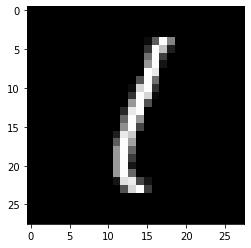

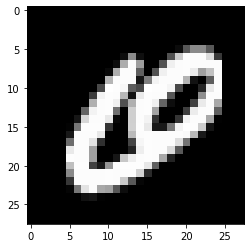

In [24]:
sample_data = next(iter(train_loader))
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((std * image) + mean) 
    plt.imshow(image, cmap = 'gray') 
    plt.show()
plot_img(sample_data[0][2])
plot_img(sample_data[0][1])


In [26]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d(p = 0.1)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1) 
model = Net()
# if is_cuda:
#     model.cuda()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
data, target = next(iter(train_loader))
output = model(Variable(data.cuda()))
print('output:', output.size(), "\ntarget:", target.size())

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [13]:
import tensorflow as tf
import torch

x = tf.reshape(tf.range(12), (3,4))
print(x)
p, q, r = tf.unstack(x)
p.shape.as_list()
print(p,q,r)

y = torch.reshape(torch.tensor(range(12)), (3,4))

a,b,c = torch.unbind(y)
print(a,b,c)


tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) tf.Tensor([4 5 6 7], shape=(4,), dtype=int32) tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tensor([0, 1, 2, 3]) tensor([4, 5, 6, 7]) tensor([ 8,  9, 10, 11])


In [2]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
import operator

vgg16_bn = models.vgg16_bn(pretrained=True).features

In [1]:
import tensorflow as tf

tf_vgg16 = tf.keras.applications.VGG16(
    include_top=False
)

Use 1 GPU limited 256.0MB memory


In [6]:
# print(vgg16_bn)

In [3]:
print(tf_vgg16.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
import numpy as np
x = np.arange(9)
x = x.reshape(1,1,3,3)
y = tf_vgg16(x)
y

In [8]:
x

array([[[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]]])